# Spotify music recommendation
* https://dev.to/mxdws/using-python-with-the-spotify-api-1d02
* https://medium.com/analytics-vidhya/build-your-own-playlist-generator-with-spotifys-api-in-python-ceb883938ce4
* https://towardsdatascience.com/get-your-spotify-streaming-history-with-python-d5a208bbcbd3
* https://medium.com/python-in-plain-english/music-recommendation-system-for-djs-d253d472677e
* https://github.com/tgel0/spotify-data
* https://towardsdatascience.com/a-visual-look-at-my-taste-in-music-a8c197a728be
* https://towardsdatascience.com/how-to-utilize-spotifys-api-and-create-a-user-interface-in-streamlit-5d8820db95d5
* https://medium.com/deep-learning-turkey/build-your-own-spotify-playlist-of-best-playlist-recommendations-fc9ebe92826a

Before diving in, let's play some music:

[Lucy in the Sky with Diamonds](https://open.spotify.com/track/25yQPHgC35WNnnOUqFhgVR)

In [1]:
lucy_id = "25yQPHgC35WNnnOUqFhgVR"
url = "https://open.spotify.com/track/"+lucy_id
import webbrowser
webbrowser.open(url)

True

## Spotipy

https://spotipy.readthedocs.io/


In [2]:
import os, tomllib
with open("../.streamlit/secrets.toml", "rb") as f:
    secrets = tomllib.load(f)
os.environ["SPOTIPY_CLIENT_ID"] = secrets['clientId']
os.environ["SPOTIPY_CLIENT_SECRET"] = secrets['clientSecret']
os.environ["SPOTIPY_REDIRECT_URI"] = "https://open.spotify.com/"

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials()

In [4]:
sp = spotipy.Spotify(auth_manager = auth_manager)

### Search track

In [5]:
results = sp.search(q='track:'+'lucy in th sky with diamonds',type='track')
items = results['tracks']['items']
if len(items) > 0:
    # tracks = items[0]
    for tracks in items:
        print(tracks['name'] + " - " + tracks['artists'][0]['name'])

Lucy In The Sky With Diamonds - Remastered 2009 - The Beatles
Lucy In The Sky With Diamonds - Remastered 2017 - The Beatles
Lucy In The Sky With Diamonds - Elton John
Lucy In The Sky With Diamonds - The Beatles
Lucy In The Sky With Diamonds - Remix - The Beatles
Lucy In The Sky With Diamonds - 2017 Mix - The Beatles
Lucy In The Sky With Diamonds - The Beatles
Lucy in the Sky With Diamonds - Happy Baby Lullaby Band
Lucy In The Sky With Diamonds - Remastered 2009 - The Beatles
Lucy In The Sky With Diamonds - From "Across The Universe" Soundtrack - Bono


In [6]:
track_results = []
for item in items:
    track_id = item['id']
    track_name = item['name']
    artist_name = item['artists'][0]['name']
    album_name = item['album']['name']
    album_url = item['album']['images'][1]['url']
    track_results.append({
        'track_id': track_id,
        'track_name': track_name,
        'artist_name': artist_name,
        'album_name': album_name,
        'album_url': album_url
    })
track_results

[{'track_id': '25yQPHgC35WNnnOUqFhgVR',
  'track_name': 'Lucy In The Sky With Diamonds - Remastered 2009',
  'artist_name': 'The Beatles',
  'album_name': "Sgt. Pepper's Lonely Hearts Club Band (Remastered)",
  'album_url': 'https://i.scdn.co/image/ab67616d00001e0234ef8f7d06cf2fc2146f420a'},
 {'track_id': '2iIRl5jf9beA2ExZWzn2nt',
  'track_name': 'Lucy In The Sky With Diamonds - Remastered 2017',
  'artist_name': 'The Beatles',
  'album_name': "Sgt. Pepper's Lonely Hearts Club Band (Super Deluxe Edition)",
  'album_url': 'https://i.scdn.co/image/ab67616d00001e02c92b57b8307e5999ec2fed69'},
 {'track_id': '13JsYnkF16pHKuOFG6uI1C',
  'track_name': 'Lucy In The Sky With Diamonds',
  'artist_name': 'Elton John',
  'album_name': 'Captain Fantastic And The Brown Dirt Cowboy',
  'album_url': 'https://i.scdn.co/image/ab67616d00001e02c5e7f836740ccdcc19960b73'},
 {'track_id': '5wLkhxwU7B9DNglfZAIrQ8',
  'track_name': 'Lucy In The Sky With Diamonds',
  'artist_name': 'The Beatles',
  'album_name': 

In [7]:
track_name = results['tracks']['items'][0]['name']
track_name

'Lucy In The Sky With Diamonds - Remastered 2009'

In [8]:
track_id = results['tracks']['items'][0]['id']
track_id

'25yQPHgC35WNnnOUqFhgVR'

In [9]:
track_artist = results['tracks']['items'][0]['artists'][0]['name']
track_artist

'The Beatles'

In [10]:
track_artist_id = results['tracks']['items'][0]['artists'][0]['id']
track_artist_id

'3WrFJ7ztbogyGnTHbHJFl2'

In [11]:
track_album = results['tracks']['items'][0]['album']['name']
track_album

"Sgt. Pepper's Lonely Hearts Club Band (Remastered)"

In [12]:
track_album_id = results['tracks']['items'][0]['album']['id']
track_album_id

'6QaVfG1pHYl1z15ZxkvVDW'

In [13]:
img_album = results['tracks']['items'][0]['album']['images'][1]['url']
import requests
r = requests.get(img_album)
open('../img/'+track_id+'.jpg', 'wb').write(r.content)

67663

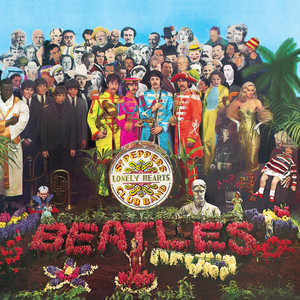

In [14]:
from IPython.display import Image
Image(filename='../img/'+track_id+'.jpg') 

### Get Track by id


![track dict](../img/track.png)

In [12]:
# Lucy in the Sky with Diamonds
lucy_id = '25yQPHgC35WNnnOUqFhgVR'
track = sp.track(lucy_id) 
# track
print(track['name']+' - '+track['album']['name'])

Lucy In The Sky With Diamonds - Remastered 2009 - Sgt. Pepper's Lonely Hearts Club Band (Remastered)


### Get Features

In [15]:
track_features = sp.audio_features(lucy_id)
track_features

[{'danceability': 0.311,
  'energy': 0.325,
  'key': 2,
  'loudness': -9.042,
  'mode': 1,
  'speechiness': 0.0283,
  'acousticness': 0.0469,
  'instrumentalness': 0,
  'liveness': 0.139,
  'valence': 0.668,
  'tempo': 65.09,
  'type': 'audio_features',
  'id': '25yQPHgC35WNnnOUqFhgVR',
  'uri': 'spotify:track:25yQPHgC35WNnnOUqFhgVR',
  'track_href': 'https://api.spotify.com/v1/tracks/25yQPHgC35WNnnOUqFhgVR',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/25yQPHgC35WNnnOUqFhgVR',
  'duration_ms': 208467,
  'time_signature': 1}]

In [16]:
import pandas as pd
# df_features = spotifyAPI.parse_features(track_features)
df = pd.DataFrame(track_features, index=[0])
df_features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
df_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.0469,0.311,0.325,0,0.139,0.0283,0.668


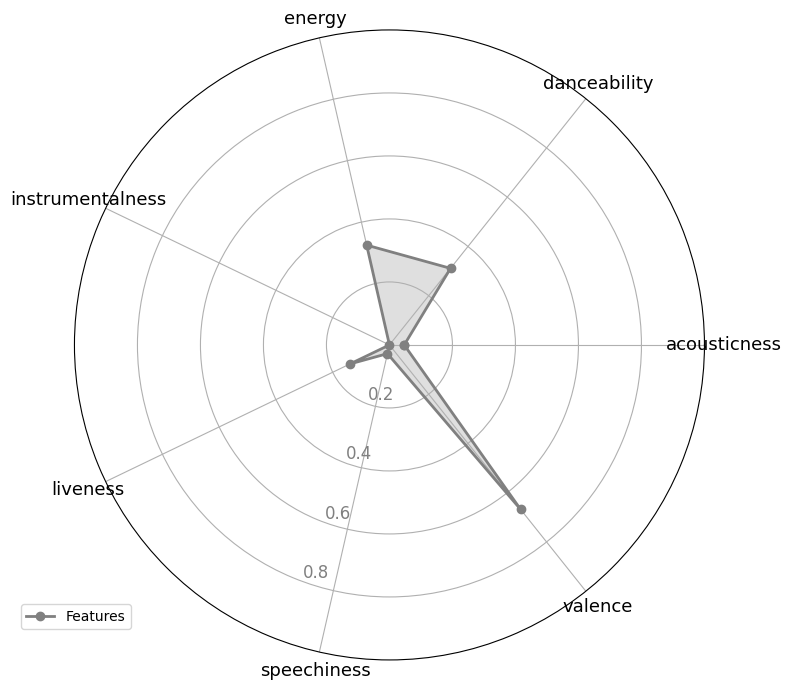

In [17]:
import spotifyAPI
spotifyAPI.feature_plot(df_features)

### Get recommendations 

In [19]:
token  = spotifyAPI.get_token(secrets['clientId'],secrets['clientSecret'])
json_response = spotifyAPI.get_track_reco(lucy_id,token)
uris =[]
for i in json_response['tracks']:
            uris.append(i)
            print(f"\"{i['name']}\" by {i['artists'][0]['name']}")

"Positively 4th Street" by Bob Dylan
"Help! - Remastered 2009" by The Beatles
"Uh-Oh, Love Comes to Town - 2005 Remaster" by Talking Heads
"My Love - 2018 Remaster" by Wings
"Do You Realize??" by The Flaming Lips
"Piece of My Heart" by Big Brother & The Holding Company
"Harvest Moon" by Neil Young
"My Generation - Stereo Version" by The Who
"The Air That I Breathe - 2008 Remaster" by The Hollies
"While My Guitar Gently Weeps - Remastered 2009" by The Beatles


In [20]:
recolist = json_response['tracks']

In [21]:
recolist[0]['name']

'Positively 4th Street'

In [22]:
recolist[0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [23]:
recolist[0]['album']['images']

[{'height': 640,
  'url': 'https://i.scdn.co/image/ab67616d0000b273e4020e52e777e32a4b8d8bb5',
  'width': 640},
 {'height': 300,
  'url': 'https://i.scdn.co/image/ab67616d00001e02e4020e52e777e32a4b8d8bb5',
  'width': 300},
 {'height': 64,
  'url': 'https://i.scdn.co/image/ab67616d00004851e4020e52e777e32a4b8d8bb5',
  'width': 64}]

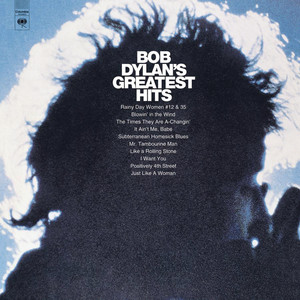

In [24]:
import requests
from IPython.display import Image
i = 0
track_url = recolist[i]['album']['images'][1]['url']
track_name = recolist[i]['name']
r = requests.get(track_url)
open('../img/'+track_name+'.jpg', 'wb').write(r.content)
Image(filename='../img/'+track_name+'.jpg') 


In [25]:
reco = pd.DataFrame(recolist)
reco

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'COMPILATION', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,233533,False,{'isrc': 'USSM16501140'},{'spotify': 'https://open.spotify.com/track/6q...,https://api.spotify.com/v1/tracks/6q9rNSvE59IV...,6q9rNSvE59IVT3ZlEorvYb,False,Positively 4th Street,58,https://p.scdn.co/mp3-preview/11999e0e29d64281...,9,track,spotify:track:6q9rNSvE59IVT3ZlEorvYb
1,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,139560,False,{'isrc': 'GBAYE0601465'},{'spotify': 'https://open.spotify.com/track/7D...,https://api.spotify.com/v1/tracks/7DD7eSuYSC5x...,7DD7eSuYSC5xk2ArU62esN,False,Help! - Remastered 2009,73,None,1,track,spotify:track:7DD7eSuYSC5xk2ArU62esN
2,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,169466,False,{'isrc': 'USWB10502856'},{'spotify': 'https://open.spotify.com/track/1z...,https://api.spotify.com/v1/tracks/1ziWFozxLNQH...,1ziWFozxLNQH76CGGizB32,False,"Uh-Oh, Love Comes to Town - 2005 Remaster",52,https://p.scdn.co/mp3-preview/82084df007395170...,1,track,spotify:track:1ziWFozxLNQH76CGGizB32
3,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,247733,False,{'isrc': 'GBCCS1800076'},{'spotify': 'https://open.spotify.com/track/0O...,https://api.spotify.com/v1/tracks/0Oj0TT23GBH2...,0Oj0TT23GBH2XuHAaSsloH,False,My Love - 2018 Remaster,62,None,2,track,spotify:track:0Oj0TT23GBH2XuHAaSsloH
4,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,213173,False,{'isrc': 'USWB10200893'},{'spotify': 'https://open.spotify.com/track/2D...,https://api.spotify.com/v1/tracks/2DFRFqWNahKt...,2DFRFqWNahKtFD112H2iEZ,False,Do You Realize??,65,https://p.scdn.co/mp3-preview/da9cd601ab876dc3...,9,track,spotify:track:2DFRFqWNahKtFD112H2iEZ
5,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,253333,False,{'isrc': 'USSM16800982'},{'spotify': 'https://open.spotify.com/track/1x...,https://api.spotify.com/v1/tracks/1xKQbqQtQWrt...,1xKQbqQtQWrtQS47fUJBtl,False,Piece of My Heart,70,https://p.scdn.co/mp3-preview/7f5967e0c7641caf...,4,track,spotify:track:1xKQbqQtQWrtQS47fUJBtl
6,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,303213,False,{'isrc': 'USRE19900694'},{'spotify': 'https://open.spotify.com/track/5l...,https://api.spotify.com/v1/tracks/5l9c6bJmzvft...,5l9c6bJmzvftumhz4TMPgk,False,Harvest Moon,77,https://p.scdn.co/mp3-preview/eb44c7946421ba6b...,4,track,spotify:track:5l9c6bJmzvftumhz4TMPgk
7,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,198706,False,{'isrc': 'GBUM71406026'},{'spotify': 'https://open.spotify.com/track/4u...,https://api.spotify.com/v1/tracks/4u9f8hqstB7i...,4u9f8hqstB7iITDJNzKhQx,False,My Generation - Stereo Version,65,None,6,track,spotify:track:4u9f8hqstB7iITDJNzKhQx
8,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,257105,False,{'isrc': 'GBGYU0800011'},{'spotify': 'https://open.spotify.com/track/3P...,https://api.spotify.com/v1/tracks/3P3fymPrC9Kg...,3P3fymPrC9KgV2Kf5oMnx0,False,The Air That I Breathe - 2008 Remaster,74,https://p.scdn.co/mp3-preview/0

### Artist albums

In [41]:
import pandas as pd
artists = pd.read_csv('../data/spotify-artist-uris.csv', header=None, index_col=0).squeeze("columns").to_dict()

In [42]:
mj_uri = artists['Michael Jackson']

results = sp.artist_albums(mj_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Scream
XSCAPE
XSCAPE
XSCAPE - Track by Track Commentary
Michael
Gold
Invincible
BLOOD ON THE DANCE FLOOR/ HIStory In The Mix
BLOOD ON THE DANCE FLOOR/ HIStory In The Mix
HIStory - PAST, PRESENT AND FUTURE - BOOK I
HIStory - PAST, PRESENT AND FUTURE - BOOK I
Dangerous
Bad (Remastered)
Bad 25th Anniversary
Thriller
Thriller
Thriller 25 Super Deluxe Edition
Off the Wall
Forever Michael
Forever, Michael
Music And Me
Music & Me
Music and Me
Ben
Ben
Got To Be There
Got To Be There


In [43]:
url = "https://open.spotify.com/artist/"+mj_uri.replace('spotify:artist:','')
import webbrowser
webbrowser.open(url)

True

### Artist top tracks

In [55]:
import ipywidgets as widgets
artist = widgets.Text(value='Led Zeppelin',disabled=False)
artist

Text(value='Led Zeppelin')

In [52]:
# how to get 30 second samples and cover art for the top 10 tracks for Led Zeppelin:
lz_uri = artists[artist.value]

results = sp.artist_top_tracks(lz_uri)

for track in results['tracks'][:3]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Stairway to Heaven - Remaster
audio    : https://p.scdn.co/mp3-preview/fc80a280376d5142c888475bd8fdcd00b4fc8d7d?cid=5430345c1c6e472fae6e3fb2c1399bce
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Immigrant Song - Remaster
audio    : https://p.scdn.co/mp3-preview/e5910b86cc788766388cca1c494094e39186aa1e?cid=5430345c1c6e472fae6e3fb2c1399bce
cover art: https://i.scdn.co/image/ab67616d0000b27390a50cfe99a4c19ff3cbfbdb

track    : Whole Lotta Love - 1990 Remaster
audio    : https://p.scdn.co/mp3-preview/f3765a6c5b194302c6e7fffc31ba21e2bd616cf6?cid=5430345c1c6e472fae6e3fb2c1399bce
cover art: https://i.scdn.co/image/ab67616d0000b273fc4f17340773c6c3579fea0d



### [Advanced Search](https://spotipy.readthedocs.io/en/2.16.1/#spotipy.client.Spotify.search)

_search(q, limit=10, offset=0, type='track', market=None)_

**Parameters**:
* q - the search query (see how to write a query in the
official documentation https://developer.spotify.com/documentation/web-api/reference/search/search/) # noqa
* limit - the number of items to return (min = 1, default = 10, max = 50)
* offset - the index of the first item to return
* type - the type of item to return. One of ‘artist’, ‘album’,
‘track’, ‘playlist’, ‘show’, or ‘episode’
* market - An ISO 3166-1 alpha-2 country code or the string
from_token.

https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b

The following code collects 1,000 Track IDs and their associated track name, artist name, and popularity score.
(it does not require a Spotify ID)

In [ ]:
artist_name = []
track_name = []
popularity = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])

## Access Scopes

* Images
  * [ugc-image-upload](https://developer.spotify.com/documentation/general/guides/scopes/#ugc-image-upload)
* Spotify Connect
  * [user-read-playback-state](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-playback-state)
  * [user-modify-playback-state](https://developer.spotify.com/documentation/general/guides/scopes/#user-modify-playback-state)
  * [user-read-currently-playing](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-currently-playing)
* Playback
  * [streaming](https://developer.spotify.com/documentation/general/guides/scopes/#streaming)
  * [app-remote-control](https://developer.spotify.com/documentation/general/guides/scopes/#app-remote-control)
* Users
  * [user-read-email](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-email)
  * [user-read-private](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-private)
* Playlists
  * [playlist-read-collaborative](https://developer.spotify.com/documentation/general/guides/scopes/#playlist-read-collaborative)
  * [playlist-modify-public](https://developer.spotify.com/documentation/general/guides/scopes/#playlist-modify-public)
  * [playlist-read-private](https://developer.spotify.com/documentation/general/guides/scopes/#playlist-read-private)
  * [playlist-modify-private](https://developer.spotify.com/documentation/general/guides/scopes/#playlist-modify-private)
* Library
  * [user-library-modify](https://developer.spotify.com/documentation/general/guides/scopes/#user-library-modify)
  * [user-library-read](https://developer.spotify.com/documentation/general/guides/scopes/#user-library-read)
* Listening History
  * [user-top-read](https://developer.spotify.com/documentation/general/guides/scopes/#user-top-read)
  * [user-read-playback-position](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-playback-position)
  * [user-read-recently-played](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-recently-played)
* Follow
  * [user-follow-read](https://developer.spotify.com/documentation/general/guides/scopes/#user-follow-read)
  * [user-follow-modify](https://developer.spotify.com/documentation/general/guides/scopes/#user-follow-modify)

### Recently played

https://developer.spotify.com/console/get-recently-played/

In [38]:
username='1146603936'

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

scope = "user-read-recently-played"

auth_user = SpotifyOAuth(scope=scope, username=username)
sp = spotipy.Spotify(auth_manager=auth_user)

results = sp.current_user_recently_played(limit=50)
results['items']
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

0 owlh  –  One Last Time
1 Yedai  –  WHITE IVERSON
2 Kamakuras  –  Lovefool
3 <3BEAT  –  Late Night Talking
4 lokash  –  Your Power
5 owlh  –  Congratulations
6 owlh  –  Congratulations
7 Yedai  –  LIGHTS OUT
8 Miro Mas  –  End of Beginning
9 lokash  –  Rush
10 Miro Mas  –  Faded
11 lokash  –  Eyes Blue Like The Atlantic
12 <3BEAT  –  Only Love Can Hurt Like This
13 owlh  –  Talking Body
14 lokash  –  Trouble
15 Kamakuras  –  Truly Madly Deeply
16 owlh  –  you broke me first
17 <3BEAT  –  Young Folks
18 LAV8  –  Californication
19 owlh  –  Everytime We Touch
20 rosarummet  –  cruel summer
21 Miro Mas  –  Bad Habits
22 Miro Mas  –  greedy
23 timbert  –  Flute
24 lokash  –  Super Rich Kids
25 Miro Mas  –  California Dreamin'
26 timbert  –  timbert dies
27 LAV8  –  I Want It That Way
28 lokash  –  Bitter Sweet Symphony
29 <3BEAT  –  Castle on the Hill
30 owlh  –  Magic
31 owlh  –  Another Day in Paradise
32 owlh  –  Flowers
33 <3BEAT  –  Love Story
34 Yedai  –  ANTI-HERO
35 <3BEAT  –  Mus

In [29]:
import json
with open("../data/recently_played_20250613.json","w") as f:
    json.dump(results,f,indent=4)

In [30]:
tracks = []
for idx, item in enumerate(results['items']):
    track = item['track']
    tracks.append([idx, track['artists'][0]['name'], track['name']])
tracks[0:5]

[[0, 'owlh', 'One Last Time'],
 [1, 'Yedai', 'WHITE IVERSON'],
 [2, 'Kamakuras', 'Lovefool'],
 [3, '<3BEAT', 'Late Night Talking'],
 [4, 'lokash', 'Your Power']]

In [31]:
trackDict = {"id":[], "artist":[],"name":[]}
for idx, item in enumerate(results['items']):
    track = item['track']
    trackDict["id"].append(idx)
    trackDict["artist"].append(track['artists'][0]['name'])
    trackDict["name"].append(track['name'])


In [37]:
import pandas as pd
trackDf = pd.DataFrame.from_dict(trackDict)
trackDf

,id,artist,name
0,0,owlh,One Last Time
1,1,Yedai,WHITE IVERSON
2,2,Kamakuras,Lovefool
3,3,<3BEAT,Late Night Talking
4,4,lokash,Your Power
5,5,owlh,Congratulations
6,6,owlh,Congratulations
7,7,Yedai,LIGHTS OUT
8,8,Miro Mas,End of Beginning
9,9,lokash,Rush


### Saved Tracks

In [39]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

scope = "user-library-read"

auth_user = SpotifyOAuth(scope=scope, username=username)
auth_user.get_cached_token()

In [72]:
from spotipy import util
token = util.prompt_for_user_token(username=username)

In [40]:
sp = spotipy.Spotify(auth_manager=auth_user)

results = sp.current_user_saved_tracks()
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

0 Miley Cyrus  –  Flowers
1 Jenifer  –  Les choses simples
2 GIMS  –  Belle
3 Vitaa  –  Je te le donne
4 Henrik  –  Half of forever
5 Miley Cyrus  –  Malibu
6 Lil Nas X  –  INDUSTRY BABY (feat. Jack Harlow)
7 Wanted Noise  –  War Pigs - Live At The Holding Company
8 Therapie TAXI  –  Blesse-moi
9 Véronique Sanson  –  Chanson sur ma drôle de vie - Remasterisé en 2008
10 Aliocha Schneider  –  Ensemble
11 Gracie Abrams  –  That’s So True
12 Benson Boone  –  Sorry I'm Here for Someone Else
13 Allie Sherlock  –  The Greatest
14 Morgan Wallen  –  Just In Case
15 Noah Cyrus  –  Don't Put It All On Me (feat. Fleet Foxes)
16 Miley Cyrus  –  End of the World
17 Lady Gaga  –  Die With A Smile
18 Benson Boone  –  Beautiful Things
19 Shawn Mendes  –  Heart of Gold


In [41]:
import json
with open("../data/saved_tracks_20250613.json","w") as f:
    json.dump(results,f,indent=4)

load previous results

In [42]:
with open("../data/saved_tracks_20221103.json","r") as f:
    results = json.load(f)

In [43]:
saved_tracks1 = results["items"][0]["track"]
saved_tracks1.keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [44]:
import pandas as pd
df = pd.DataFrame.from_dict(results["items"])
df.head(5)

,added_at,track
0,2022-11-01T21:34:40Z,"{'album': {'album_type': 'album', 'artists': [..."
1,2022-10-31T12:16:36Z,"{'album': {'album_type': 'album', 'artists': [..."
2,2022-07-20T23:12:42Z,"{'album': {'album_type': 'compilation', 'artis..."
3,2022-06-25T09:58:36Z,"{'album': {'album_type': 'album', 'artists': [..."
4,2022-06-21T08:10:55Z,"{'album': {'album_type': 'single', 'artists': ..."


In [45]:
tracks = []
for idx, item in enumerate(results['items']):
    track = item['track']
    tracks.append([idx, track['artists'][0]['name'], track['name']])

In [46]:
tracks[0:5]

[[0, 'Janie', 'La Macarena'],
 [1,
  'Lilly Wood and The Prick',
  'Prayer In C (Robin Schulz Remix) [Radio Edit]'],
 [2,
  'Pink Floyd',
  'Shine On You Crazy Diamond (Parts 1 - 5) [Edit] [2011 Remastered Version]'],
 [3, 'Kate Bush', 'Running Up That Hill (A Deal With God)'],
 [4, 'Charlie Puth', 'Attention - Acoustic']]

### Saved Albums
https://developer.spotify.com/console/get-current-user-saved-albums

In [48]:
results = sp.current_user_saved_albums(limit=20)
# results
# results['items'][0]
for idx, item in enumerate(results['items']):
    album = item['album']
    print(idx, album['artists'][0]['name'],album['name'])

0 Miley Cyrus Something Beautiful
1 Imagine Dragons Reflections (From The Vault Of Smoke + Mirrors)
2 Taylor Swift Midnights
3 Taylor Swift folklore
4 Taylor Swift Red
5 Joshua Radin ONE DAY HOME
6 Ed Sheeran +-=÷× (Tour Collection: Live)
7 Shawn Mendes Shawn
8 Hans Zimmer LIVE
9 James Bay Up All Night
10 Imagine Dragons LOOM
11 Taylor Swift THE TORTURED POETS DEPARTMENT
12 Beyoncé COWBOY CARTER
13 Justin Timberlake Everything I Thought It Was
14 Sam Fischer This City
15 Taylor Swift Speak Now (Taylor's Version)
16 Rosa Linn Lay Your Hands Upon My Heart
17 Janie La Macarena
18 Lady Gaga Hold My Hand (Music From The Motion Picture "Top Gun: Maverick")
19 The Cast of Netflix's Film tick, tick... BOOM! tick, tick... BOOM! (Soundtrack from the Netflix Film)


### Playlist
https://developer.spotify.com/console/get-current-user-playlists/

In [29]:
scope = "playlist-read-private"

auth_user = SpotifyOAuth(scope=scope, username=username)
sp = spotipy.Spotify(auth_manager=auth_user)

results = sp.current_user_playlists(limit=50)
results['items'][0]
for idx, item in enumerate(results['items']):
    print(idx, item['name'], " – public: ", item['public'])

0 Laidback Acoustic  – public:  False
1 Top 100 Play Music  – public:  True
2 Acoustic Blues Country Guitar  – public:  True
3 Piano Ballads  – public:  False
4 Nelson Recommended Tracks  – public:  True
5 Blind test  – public:  True
6 Discover Weekly  – public:  False
7 Sélection  – public:  True
8 Radio-Favoriten  – public:  True
9 Best  – public:  False
10 First 36.7  – public:  False
11 Gadz'Art  – public:  False
12 House  – public:  False
13 Jazz  – public:  False
14 Muscu  – public:  False
15 Musique films  – public:  False
16 news  – public:  False
17 On-the-go 1  – public:  False
18 On-the-go 2  – public:  False
19 On-the-go 3  – public:  False
20 On-the-go 4  – public:  False
21 On-the-go 5  – public:  False
22 On-the-go 6  – public:  False
23 Rap US  – public:  False
24 Sands  – public:  False
25 Scrubs  – public:  False
26 Trance  – public:  False
27 US variety  – public:  False
28 We were here  – public:  False


#### Add tracks to playlist

In [102]:
import pandas as pd

top100 = pd.read_csv('top100id.csv',index_col=0)
top100.head()

,title,album,artist,time,stars,played,deleted,id
485,In the Sun,Grey&#39;s Anatomy Soundtrack,Chris Martin ft. Michael Stipe,229000,5,71,NaN,2MLHyLy5z5l5YRp7momlgw
983,Some Kind Of Wonderful,Grand Theft Auto: San Andreas OST,Grand Funk Railroad,203000,4,70,NaN,1cU34sZG9kF4FYHCoAD0Ib
1111,Today,First between 3rd and 4th,Joshua Radin,217000,5,69,NaN,0u5aO1GYsIhAWCPuXdwnak
1237,You Know My Name,James Bond Themes,Chris Cornell,242466,4,58,NaN,0Dlm41iXvTsIVsEOce3yX6
263,Don&#39;t panic,Garden state [Soundtrack],Coldplay,137000,4,49,NaN,NaN


In [106]:
track_id = top100.id
track_id = track_id.dropna()
track_id

485     2MLHyLy5z5l5YRp7momlgw
983     1cU34sZG9kF4FYHCoAD0Ib
1111    0u5aO1GYsIhAWCPuXdwnak
1237    0Dlm41iXvTsIVsEOce3yX6
252     2M7UdnD0fEaryh8TnCvqFX
                 ...          
1000    5VaJ9leHPd2aDgvrGBMD39
30      3H3cOQ6LBLSvmcaV7QkZEu
1139    6a899bXlCuViXW2Qs8Rdqo
250     5MbNAHqNksNDycMZ0WUaO5
350     7asyVbwQE7IbA3x2be7bdI
Name: id, Length: 81, dtype: object

In [107]:
scope = 'playlist-modify-public'

auth_user = SpotifyOAuth(scope=scope, username=username)
sp = spotipy.Spotify(auth_manager=auth_user)

playlist_id = "2hNrDKdSNh889LLYEmR1DK"
sp.playlist_add_items(playlist_id,track_id)

{'snapshot_id': 'MiwzNDFiYWM2ODM2ODU4YTc4OTNhMDZiODlkMWEzODQ1ODI0OGQ1Yjcw'}

In [90]:
### Get playlist by Id
import requests
playlistId = "2hNrDKdSNh889LLYEmR1DK" # Top 100 Play Music
playlistUrl = f"https://api.spotify.com/v1/playlists/{playlistId}"

headers = {
    "Authorization": "Bearer " + token
}

res = requests.get(url=playlistUrl, headers=headers)
import json
with open('playlist.json', 'w') as outfile:
    json.dump(res.json(), outfile, indent=2)
# print(json.dumps(res.json(), indent=2))

## Parse Streaming History

In [81]:
import ast
from typing import List
from os import listdir
files = '../spotifyData/StreamingHistory0.json'

all_streamings = []

with open(files, 'r', encoding='UTF-8') as f:
    new_streamings = ast.literal_eval(f.read())
    all_streamings += [streaming for streaming 
                        in new_streamings]
all_streamings[0]

{'endTime': '2020-06-10 16:56',
 'artistName': 'Alphaville',
 'trackName': 'Forever Young',
 'msPlayed': 35538}

In [82]:
unique_tracks = list(set([streaming['trackName'] 
                for streaming in all_streamings]))
unique_tracks[0]

'All Over Town'

In [83]:
import spotifyAPI

all_features = {}
for track in unique_tracks:
    track_id = spotifyAPI.get_track_id(track, token)
    features = spotifyAPI.get_features(track_id, token)
    if features:
        all_features[track] = features

In [84]:
with_features = []
for track_name, features in all_features.items():
    with_features.append({'name': track_name, **features})

In [85]:
import pandas as pd
df = pd.DataFrame(with_features)
df.to_csv('../data/streaming_history.csv')

In [86]:
df

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,All Over Town,0.582,0.236,8,-8.979,1,0.0311,0.8580,0.000000,0.0878,0.235,63.675,audio_features,1oz7yTFGbsZdoIL1u75d0O,spotify:track:1oz7yTFGbsZdoIL1u75d0O,https://api.spotify.com/v1/tracks/1oz7yTFGbsZd...,https://api.spotify.com/v1/audio-analysis/1oz7...,193742,4
1,Lost Stars,0.498,0.583,0,-4.762,1,0.0274,0.1050,0.000000,0.0698,0.400,82.071,audio_features,22VjpPvok4jeoRjWlQThZr,spotify:track:22VjpPvok4jeoRjWlQThZr,https://api.spotify.com/v1/tracks/22VjpPvok4je...,https://api.spotify.com/v1/audio-analysis/22Vj...,267920,4
2,Sous le vent,0.495,0.501,11,-7.511,1,0.0449,0.4990,0.000000,0.0973,0.303,140.616,audio_features,6VZB0ttlqGjpGMAcaomXh9,spotify:track:6VZB0ttlqGjpGMAcaomXh9,https://api.spotify.com/v1/tracks/6VZB0ttlqGjp...,https://api.spotify.com/v1/audio-analysis/6VZB...,211293,4
3,Hurricane,0.372,0.915,11,-4.577,1,0.0850,0.0640,0.000110,0.1260,0.466,91.124,audio_features,1SlLP2AI4L2oh3VRJfHBpf,spotify:track:1SlLP2AI4L2oh3VRJfHBpf,https://api.spotify.com/v1/tracks/1SlLP2AI4L2o...,https://api.spotify.com/v1/audio-analysis/1SlL...,153222,3
4,Knocking on Heavens Door,0.496,0.739,6,-7.193,1,0.0415,0.0211,0.004440,0.1060,0.378,132.410,audio_features,4JiEyzf0Md7KEFFGWDDdCr,spotify:track:4JiEyzf0Md7KEFFGWDDdCr,https://api.spotify.com/v1/tracks/4JiEyzf0Md7K...,https://api.spotify.com/v1/audio-analysis/4JiE...,336000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Be Yourself,0.423,0.845,11,-3.509,0,0.0559,0.1430,0.000005,0.2130,0.317,116.602,audio_features,3zwmW1gM4E8FlHXV5nE16u,spotify:track:3zwmW1gM4E8FlHXV5nE16u,https://api.spotify.com/v1/tracks/3zwmW1gM4E8F...,https://api.spotify.com/v1/audio-analysis/3zwm...,278973,4
61,Take Five,0.454,0.260,8,-13.193,0,0.0401,0.5390,0.000780,0.0675,0.598,174.322,audio_features,1YQWosTIljIvxAgHWTp7KP,spotify:track:1YQWosTIljIvxAgHWTp7KP,https://api.spotify.com/v1/tracks/1YQWosTIljIv...,https://api.spotify.com/v1/audio-analysis/1YQW...,324133,5
62,Flake,0.758,0.654,5,-10.980,1,0.0400,0.6620,0.019700,0.1990,0.962,97.657,audio_features,7hOXiS6kDP4vYIh9DBsNgK,spotify:track:7hOXiS6kDP4vYIh9DBsNgK,https://api.spotify.com/v1/tracks/7hOXiS6kDP4v...,https://api.spotify.com/v1/audio-analysis/7hOX...,281749,4
63,Californication,0.592,0.767,9,-2.788,0,0.0270,0.0021,0.001650,0.1270,0.328,96.483,audio_features,48UPSzbZjgc449aqz8bxox,spotify:track:48UPSzbZjgc449aqz8bxox,https://api.spotify.com/v1/tracks/48UPSzbZjgc4...,https://api.spotify.com/v1/audio-analysis/48UP...,329733,4


## Music Taste Analysis
Inspiration:
* [article](https://towardsdatascience.com/a-music-taste-analysis-using-spotify-api-and-python-e52d186db5fc)
* [repo](https://github.com/jmcabreira/A-Music-Taste-Analysis-Using-Spotify-API-and-Python.)

In [87]:
features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.8580,0.582,0.236,0.000000,0.0878,0.0311,0.235
1,0.1050,0.498,0.583,0.000000,0.0698,0.0274,0.400
2,0.4990,0.495,0.501,0.000000,0.0973,0.0449,0.303
3,0.0640,0.372,0.915,0.000110,0.1260,0.0850,0.466
4,0.0211,0.496,0.739,0.004440,0.1060,0.0415,0.378
...,...,...,...,...,...,...,...
60,0.1430,0.423,0.845,0.000005,0.2130,0.0559,0.317
61,0.5390,0.454,0.260,0.000780,0.0675,0.0401,0.598
62,0.6620,0.758,0.654,0.019700,0.1990,0.0400,0.962
63,0.0021,0.592,0.767,0.001650,0.1270,0.0270,0.328


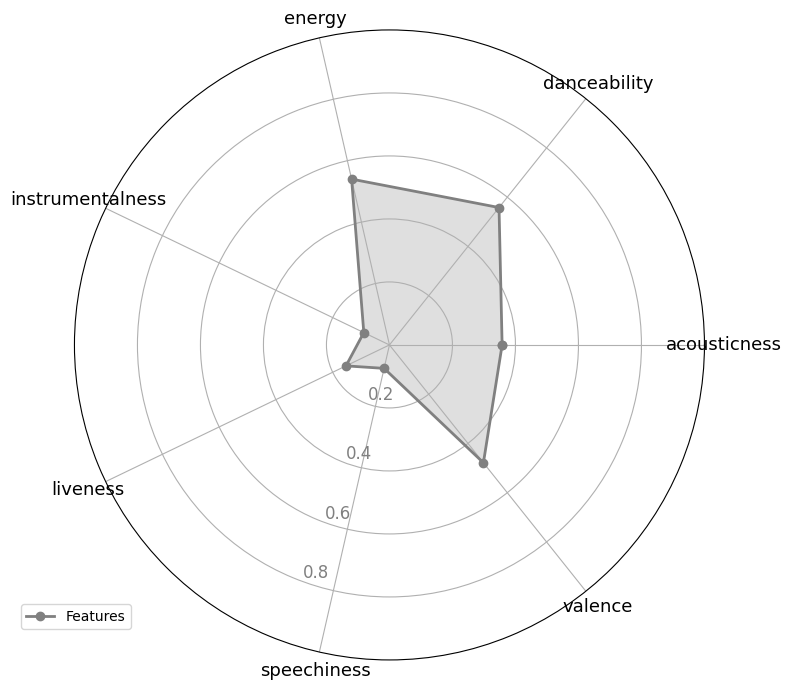

In [88]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt

labels= list(features)[:]
stats= features.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Features", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[0:7] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
